# Exploring Terms in the Encyclopaedia Britannica


### Loading the necessary libraries

In [1]:
import yaml
import matplotlib.pyplot as plt
import numpy as np
import collections
import matplotlib as mpl

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
from yaml import safe_load
from pandas.io.json import json_normalize

### Functions

In [4]:
def create_graph_df(df, num=None):
    if num:
        graph_df = nx.from_pandas_edgelist(df.head(n=num), source='term', target='related_terms', edge_attr=True, create_using=nx.MultiDiGraph())
    
    else: 
        graph_df = nx.from_pandas_edgelist(df, source='term', target='related_terms', edge_attr=True, create_using=nx.MultiDiGraph())

    return graph_df
   

In [5]:
def explore_a_term(df, term):
    #term_df= df[df['term'].str.contains(term)]
    term_df = df[df["term"]==term]
    #G = create_graph_df(term_df, 50)
    G = create_graph_df(term_df)
    plt.figure(figsize=(5,5))
    pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
    nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
    plt.show()

## We have dataframe with these information



- definition:           Definition of the article
- edition_num:          1,2,3,4,5,6,7,8
- header:               Header of the page's article                                  
- num_article_words:    Number of words per article
- place:                Place where the volume was edited (e.g. Edinburgh)                                    
- related_terms:        Related articles (see X article)  
- source_text_file:     File Path of the XML file from which the article belongs       
- term:                 Article name                            
- term_id_in_page:      Number of article in the page     
- start_page:           Number page in which the article starts 
- end_page:             Number page in which the article ends 
- title:               Title of the Volume
- type_article:            Type of Page [Full Page| Topic| Mix | Articles]                                       
- year:                 Year of the Volume
- volume:               volume (e.g. 1)
- letters:              leters of the volume (A-B)


### 1. Load dataframe from JSON file

In [16]:
df = pd.read_json('./results_NLS/results_eb_1_edition_postprocess_dataframe', orient="index") 

In [17]:
df = df[["term", "definition", "related_terms", "num_article_words", "header", "start_page", "end_page",  "term_id_in_page", "type_article", "edition_num", "volume", "letters", "year", "title",  "place", "source_text_file"  ]]
df

,term,definition,related_terms,num_article_words,header,start_page,end_page,term_id_in_page,type_article,edition_num,volume,letters,year,title,place,source_text_file
10,AADE,"the name of two rivers, one in the country of ...",[],19,EncyclopaediaBritannica,15,15,3,Article,1,1,A-B,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,144133901/alto/188082904.34.xml
100,ABETTOR,"a law-term, implying one who encourages anothe...",[],55,ABE,18,18,0,Article,1,1,A-B,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,144133901/alto/188082943.34.xml
1000,ALBY,"or Alb 1, a city of France in the province of ...",[],20,ALBALC,106,106,22,Mix,1,1,A-B,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,144133901/alto/188084090.34.xml
10000,NUYS,"a town of Germany, twenty miles north of Co-",[],9,NYBNYS,473,473,1,Article,1,3,M-Z,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,144133903/alto/144810223.34.xml
10001,INYBURG,"a town of Denmark, situated at the eafiend of ...",[],25,NYBNYS,473,473,2,Article,1,3,M-Z,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,144133903/alto/144810223.34.xml
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NUSANCE,"in law, a thing done to the annoyance of Nufan...",[],127,NUTNUT,472,472,7,Article,1,3,M-Z,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,144133903/alto/144810211.34.xml
9996,NUT,"among botaniils, denotes a pericarpiurn of an ...",[],14,NUTNUT,472,472,8,Article,1,3,M-Z,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,144133903/alto/144810211.34.xml
9997,NUTATION,"in aflronomy, a kind of tremulous motion of th...",[],33,NUTNUT,472,472,9,Article,1,3,M-Z,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,144133903/alto/144810211.34.xml
9998,NUTMEG,"the kernel of a large fruit, not unlike the Th...","[MACE, PEEMED, DUTCH, THELARGEFT, EAP-INDIES, ...",451,NUTNUT,472,472,10,Article,1,3,M-Z,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,144133903/alto/144810211.34.xml


### 2. Related Terms

### 2.1 Selecting just the volumes 1771

In [18]:
df_1771_vol1 = df[(df['year'] == 1771) & (df['volume'] == 1) ]


### 2.2 Counting the number of terms

**Remember**: A term can appear in more than once  per eddition. 

In [19]:
df_1771_vol1.count()

term                 3899
definition           3899
related_terms        3899
num_article_words    3899
header               3899
start_page           3899
end_page             3899
term_id_in_page      3899
type_article         3899
edition_num          3899
volume               3899
letters              3899
year                 3899
title                3899
place                3899
source_text_file     3899
dtype: int64

**Note**: This means that we have 4204 terms in 1771

### 3. NOT DOING IT: Filtering the terms that have related terms

NOT DOING IT ANYMORE: We are interested to explore the relations between terms, so we are going to filter out all these terms wich do not have related terms

In [20]:
#df_related_1771_vol1=df_1771_vol1[df_1771_vol1['related_terms'].apply(lambda x: len(x)) > 0]

### NEW: 3. WITHOUT Filtering the terms that have related terms

We need to "explode" teh column "related_terms", so we have a row, per related term. 

So, lets imagine that we have the term "X" and its related terms are "Y" and "Z". Originally we would a row, in which the related_terms colum value would be ["X", "Y"]. 

After exploding the related_terms colum, now we are going to have two rows with exactly the same information, but in one row, we will have "Y" as the related term, and in another "Z". 

In [21]:
# Experimenting without filtering by related_terms

df_related_1771_vol1=df_1771_vol1.explode('related_terms')

Instead of filtering by related_terms, we are going to give the same term, to the related_terms column, if a related_term colum is NaN

In [22]:
df_related_1771_vol1['related_terms'] =df_related_1771_vol1['related_terms'].fillna(df_related_1771_vol1['term'])

In [23]:
df_related_1771_vol1

,term,definition,related_terms,num_article_words,header,start_page,end_page,term_id_in_page,type_article,edition_num,volume,letters,year,title,place,source_text_file
7,OR,"A NEW A D I C T I A A, the name of several riv...",OR,54,EncyclopaediaBritannica,15,15,0,Article,1,1,A-B,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,144133901/alto/188082904.34.xml
8,AABAM,"a term, among alchemifts, for lead,",AABAM,6,EncyclopaediaBritannica,15,15,1,Article,1,1,A-B,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,144133901/alto/188082904.34.xml
9,AACH,the name of a town and river in Swabia. It is ...,AACH,17,EncyclopaediaBritannica,15,15,2,Article,1,1,A-B,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,144133901/alto/188082904.34.xml
10,AADE,"the name of two rivers, one in the country of ...",AADE,19,EncyclopaediaBritannica,15,15,3,Article,1,1,A-B,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,144133901/alto/188082904.34.xml
11,AAHUS,a small town and diftrift in Weftphalia.,AAHUS,7,EncyclopaediaBritannica,15,15,4,Article,1,1,A-B,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,144133901/alto/188082904.34.xml
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3963,BYSSUS,"in botany, a genus of moffes belonging to the ...",BYSSUS,38,BUXBYZ,829,829,11,Article,1,1,A-B,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,144133901/alto/188093489.34.xml
3964,BYSSUS,"in antiquity, that fine Egyptian linen whereof...",BYSSUS,77,BUXBYZ,829,829,12,Article,1,1,A-B,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,144133901/alto/188093489.34.xml
3965,BYZANT,See Bezant. ^,BEZANT,3,BUXBYZ,829,829,13,Article,1,1,A-B,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,144133901/alto/188093489.34.xml
3966,BYZANTIUM,"the ancient mame of Constantinople,",BYZANTIUM,5,BUXBYZ,829,829,14,Article,1,1,A-B,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,144133901/alto/188093489.34.xml


### 4.Creating a Knowledge graph 


VERSION 1: Using all the nodes!


In [45]:

graph_df = create_graph_df(df_related_1771_vol1)


/anaconda3/envs/mypython3/lib/python3.7/site-packages/networkx-2.2-py3.7.egg/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/anaconda3/envs/mypython3/lib/python3.7/site-packages/networkx-2.2-py3.7.egg/networkx/drawing/nx_pylab.py:660: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


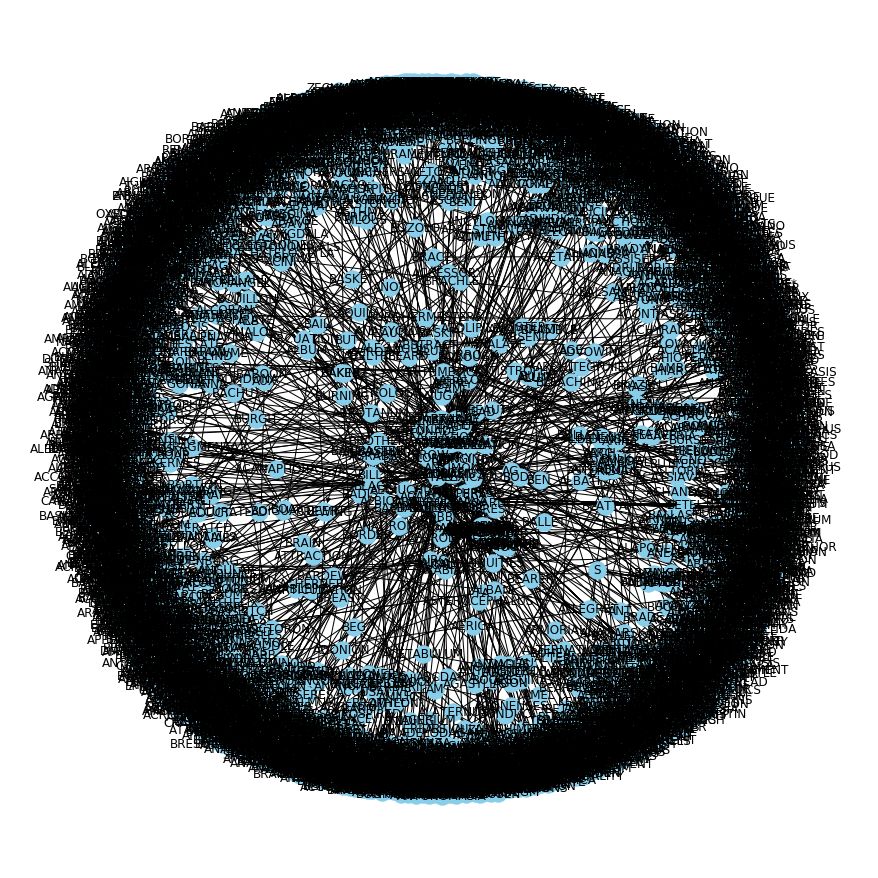

In [46]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(graph_df)
nx.draw(graph_df, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

### Just with the first 50 terms

In [47]:
graph_df = create_graph_df(df_related_1771_vol1, 50)

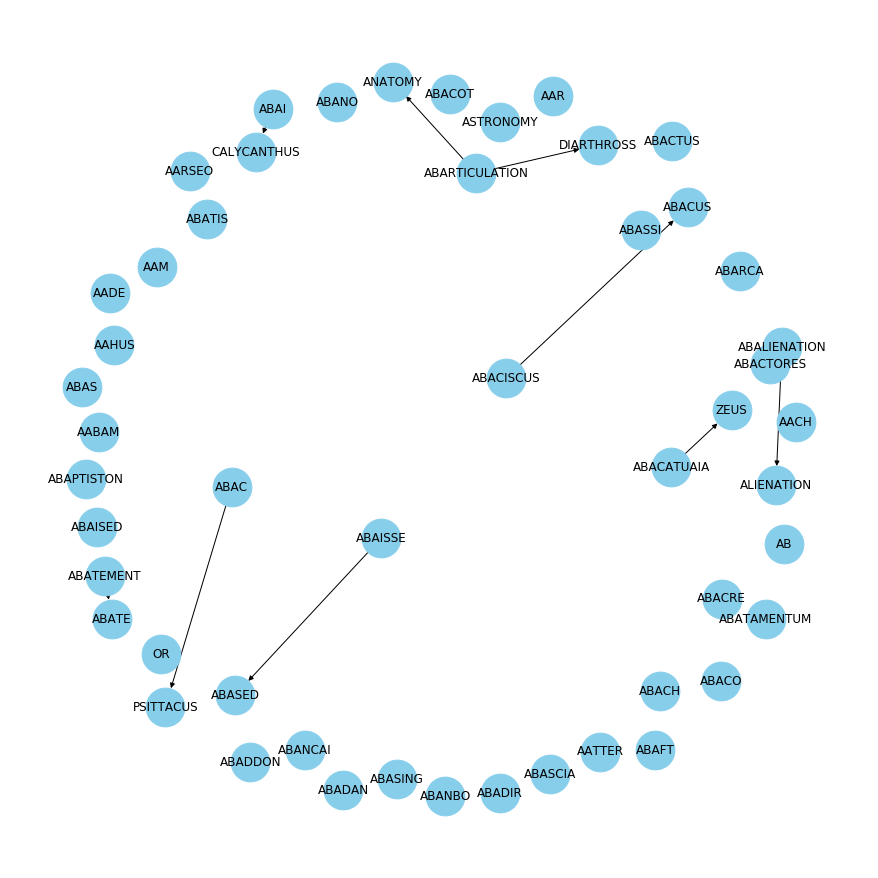

In [48]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph_df, k = 0.5) # k regulates the distance between nodes
nx.draw(graph_df, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

Here are the 50 terms stored in a list

In [49]:
#list_terms= df_related_1771_vol1[["term"]].head(n=50).values.tolist()
#list_terms_update=[]
#for i in list_terms:
#    list_terms_update.append(i[0])
#list_terms_update

### 5.Exploring the relations of one term - ABACISCUS

We are going to use the term ABACISCUS, and visualize its related terms in a graph. 

In [50]:
ABACISCUS_df= df_related_1771_vol1[df_related_1771_vol1['term'].str.contains("ABACISCUS")]
ABACISCUS_df

,term,definition,related_terms,num_article_words,header,start_page,end_page,term_id_in_page,type_article,edition_num,volume,letters,year,title,place,source_text_file
22,ABACISCUS,See ABACUS.,ABACUS,2,EncyclopaediaBritannica,15,15,15,Article,1,1,A-B,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,144133901/alto/188082904.34.xml


In [51]:
G = create_graph_df(ABACISCUS_df)

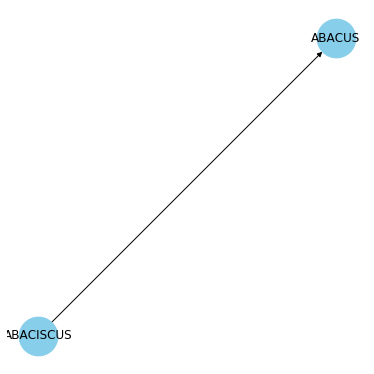

In [52]:
plt.figure(figsize=(5,5))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

### 5.Exploring the terms with most relations.

Now lets get the 10 terms with most relations. For that, we have to group the dataframe by terms, and create an extra colum, with the count. 

In [53]:
rt=df_related_1771_vol1.groupby(['term']).size().rename('count').reset_index().sort_values(['count'], ascending=False)
rt

,term,count
2711,BBTE,101
3253,BOTANY,86
1368,ANA,50
1947,ARCHITECTURE,35
2020,ARITHMETICK,23
...,...,...
196,ACAPATLI,1
1462,ANDROMEDA,1
1463,ANDROMOTY,1
1464,ANDRON,1


And now lets get the 10 most repeated terms

In [54]:
rt.nlargest(10, 'count')

,term,count
2711,BBTE,101
3253,BOTANY,86
1368,ANA,50
1947,ARCHITECTURE,35
2020,ARITHMETICK,23
2215,ASTRONOMY,17
3362,BRANDY,16
2010,ARIH,15
3749,S,15
1445,ANATOMY,13


Lets select ASTRONOMY term

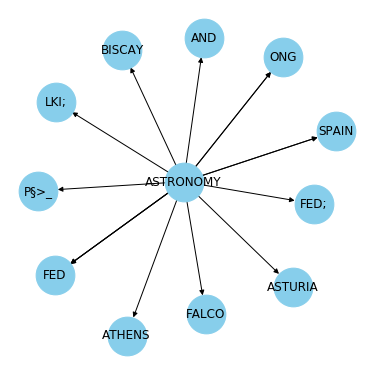

In [55]:
explore_a_term(df_related_1771_vol1, "ASTRONOMY")

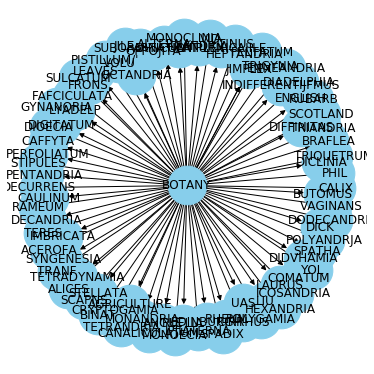

In [56]:
explore_a_term(df_related_1771_vol1, "BOTANY")

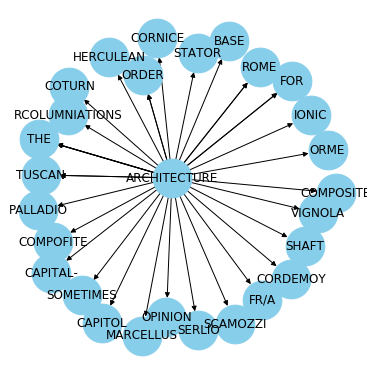

In [57]:
explore_a_term(df_related_1771_vol1, "ARCHITECTURE")

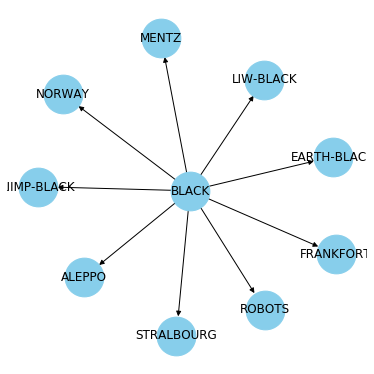

In [58]:
explore_a_term(df_related_1771_vol1, "BLACK")

In [59]:
ALGEBRA_df= df_related_1771_vol1[df_related_1771_vol1['term'] == "ALGEBRA"]
ALGEBRA_df["related_terms"]

1082    ALGEBRA
1085    ALGEBRA
1087    ALGEBRA
1094    ALGEBRA
Name: related_terms, dtype: object

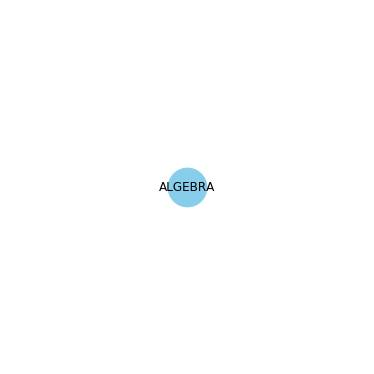

In [60]:
explore_a_term(df_related_1771_vol1, "ALGEBRA")

In [61]:
ALGEBRA_df= df_related_1771_vol1[df_related_1771_vol1['related_terms'] == "ALGEBRA"]

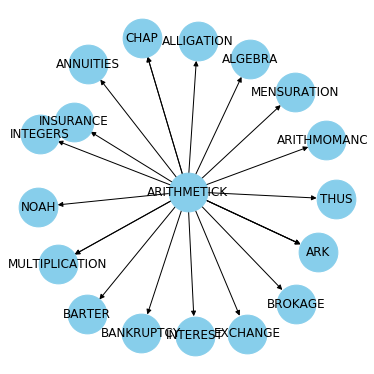

In [62]:
explore_a_term(df_related_1771_vol1, "ARITHMETICK")